# EDA - Exploratory Data Analysis

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../data/processed/clean_data.csv', delimiter=',');
data

,Time,WindSpeed,ActivePower,WindDirection,YawAngle
0,2017-01-01 00:00:00,13.525400,5229.550000,229.658056,116.834000
1,2017-01-01 00:10:00,13.525400,5229.550000,229.195125,116.834000
2,2017-01-01 00:20:00,13.477100,5235.970000,228.231357,116.283000
3,2017-01-01 00:30:00,13.223300,5234.350000,227.924482,115.552000
4,2017-01-01 00:40:00,13.609400,5232.010000,226.883952,118.312000
...,...,...,...,...,...
413995,2020-12-31 23:10:00,2.680484,-25.521072,346.802046,347.655832
413996,2020-12-31 23:20:00,2.324961,-24.290187,335.144025,343.985084
413997,2020-12-31 23:30:00,2.068780,-23.819663,322.270213,328.523030
413998,2020-12-31 23:40:00,2.178742,-22.054977,315.473284,322.328713


## Feature Engineering

Se divide la columna tiempo por estaciones:
- Primavera: abril, mayo y junio.
- Verano: julio, agosto y septiembre.
- Otoño: octubre, noviembre y diciembre.
- Invierno: enero, febrero y marzo.

In [3]:
estacion = []
for i in data['Time']:
    if (i[5:7] in ['01','02','03']):
        estacion.append('invierno')
    else:
        if (i[5:7] in ['04','05','06']):
            estacion.append('primavera')
        else:
            if (i[5:7] in ['07','08','09']):
                estacion.append('verano')
            else:
                estacion.append('otoño')

data['Estacion'] = estacion

Tambien se divide la columna tiempo por momentos del día:
- Mañana: de 6 a 12.
- Tarde: de 13 a 19.
- Noche: de 18 a 00.
- Madrugada: de 1 a 5.

In [4]:
momento = []
for i in data['Time']:
    if (i[11:13] in ['06','07','08','09','10','11','12']):
        momento.append('mañana')
    else:
        if (i[11:13] in ['13','14','15','16','17','18','19']):
            momento.append('tarde')
        else:
            if (i[11:13] in ['20','21','22','23','00']):
                momento.append('noche')
            else:
                momento.append('madrugada')

data['MomentoDia'] = momento

Finalmente se divide por año.

In [5]:
año = []
for i in data['Time']:
    año.append(i[:4])

data['Año'] = año

Despues de sacar información de la columna Time, se coloca como indice del DataFrame.

In [6]:
data = data.set_index('Time')
data

,WindSpeed,ActivePower,WindDirection,YawAngle,Estacion,MomentoDia,Año
Time,,,,,,,
2017-01-01 00:00:00,13.525400,5229.550000,229.658056,116.834000,invierno,noche,2017
2017-01-01 00:10:00,13.525400,5229.550000,229.195125,116.834000,invierno,noche,2017
2017-01-01 00:20:00,13.477100,5235.970000,228.231357,116.283000,invierno,noche,2017
2017-01-01 00:30:00,13.223300,5234.350000,227.924482,115.552000,invierno,noche,2017
2017-01-01 00:40:00,13.609400,5232.010000,226.883952,118.312000,invierno,noche,2017
...,...,...,...,...,...,...,...
2020-12-31 23:10:00,2.680484,-25.521072,346.802046,347.655832,otoño,noche,2020
2020-12-31 23:20:00,2.324961,-24.290187,335.144025,343.985084,otoño,noche,2020
2020-12-31 23:30:00,2.068780,-23.819663,322.270213,328.523030,otoño,noche,2020


### Cyclical variables

In [7]:
# Wind Direction
data['Sin_WD'] = np.sin(2 * np.pi * data['WindDirection'] / max(data['WindDirection']))
data['Cos_WD'] = np.cos(2 * np.pi * data['WindDirection'] / max(data['WindDirection']))

# Yaw Angle
data['Sin_Yaw'] = np.sin(2 * np.pi * data['YawAngle'] / max(data['YawAngle']))
data['Cos_Yaw'] = np.cos(2 * np.pi * data['YawAngle'] / max(data['YawAngle']))

## Correlation matrix

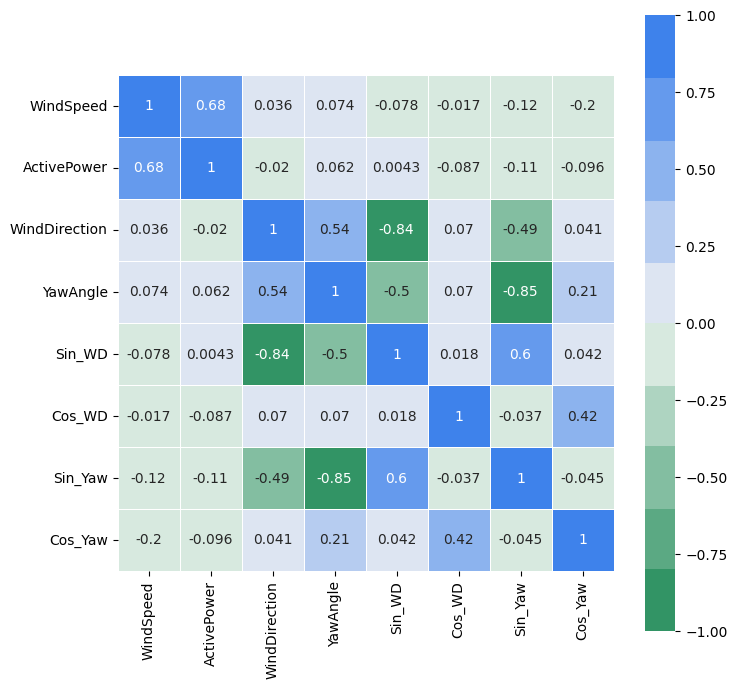

In [8]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),
            vmin=-1,
            vmax=1,
            center=0,
            cmap=sns.diverging_palette(145, 255, s=85, l=55, n=10),
            square=True,
            annot=True,
            linewidths=.5);

## Análisis univariante

### Velocidad del viento

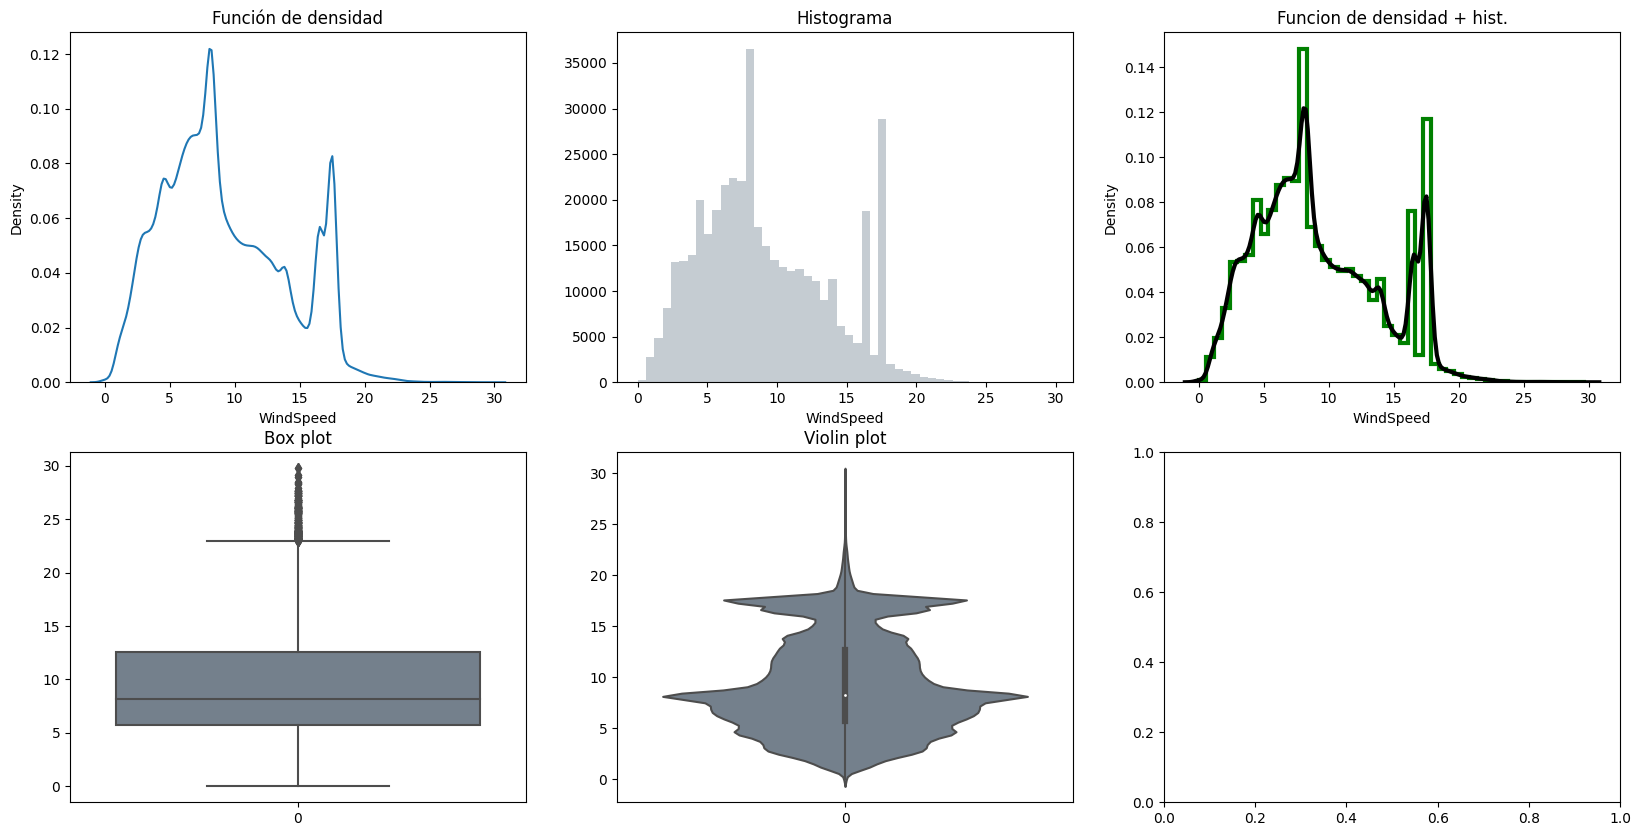

In [9]:
### WIND SPEED ###
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Funcion de densidad
sns.distplot(data['WindSpeed'], hist = False, ax=axes[0, 0])
axes[0, 0].set_title("Función de densidad")

# Histograma
sns.distplot(data['WindSpeed'],
             kde=False,
             color='slategray',
             ax=axes[0, 1]);

axes[0, 1].set_title("Histograma")

# Funcion de densidad + histograma
sns.distplot(data['WindSpeed'],
            kde_kws={"color": "k", "lw": 3, "label": "KDE"},
            hist_kws={"histtype": "step", "linewidth": 3,
                      "alpha": 1, "color": "g"},
             ax=axes[0, 2])
axes[0, 2].set_title("Funcion de densidad + hist.")

# Boxplot
sns.boxplot(data['WindSpeed'], color="slategray", ax=axes[1, 0])
axes[1, 0].set_title("Box plot")

# Violin plot
sns.violinplot(data['WindSpeed'], color="slategray", ax=axes[1, 1]);
axes[1, 1].set_title("Violin plot");

### Potencia Activa

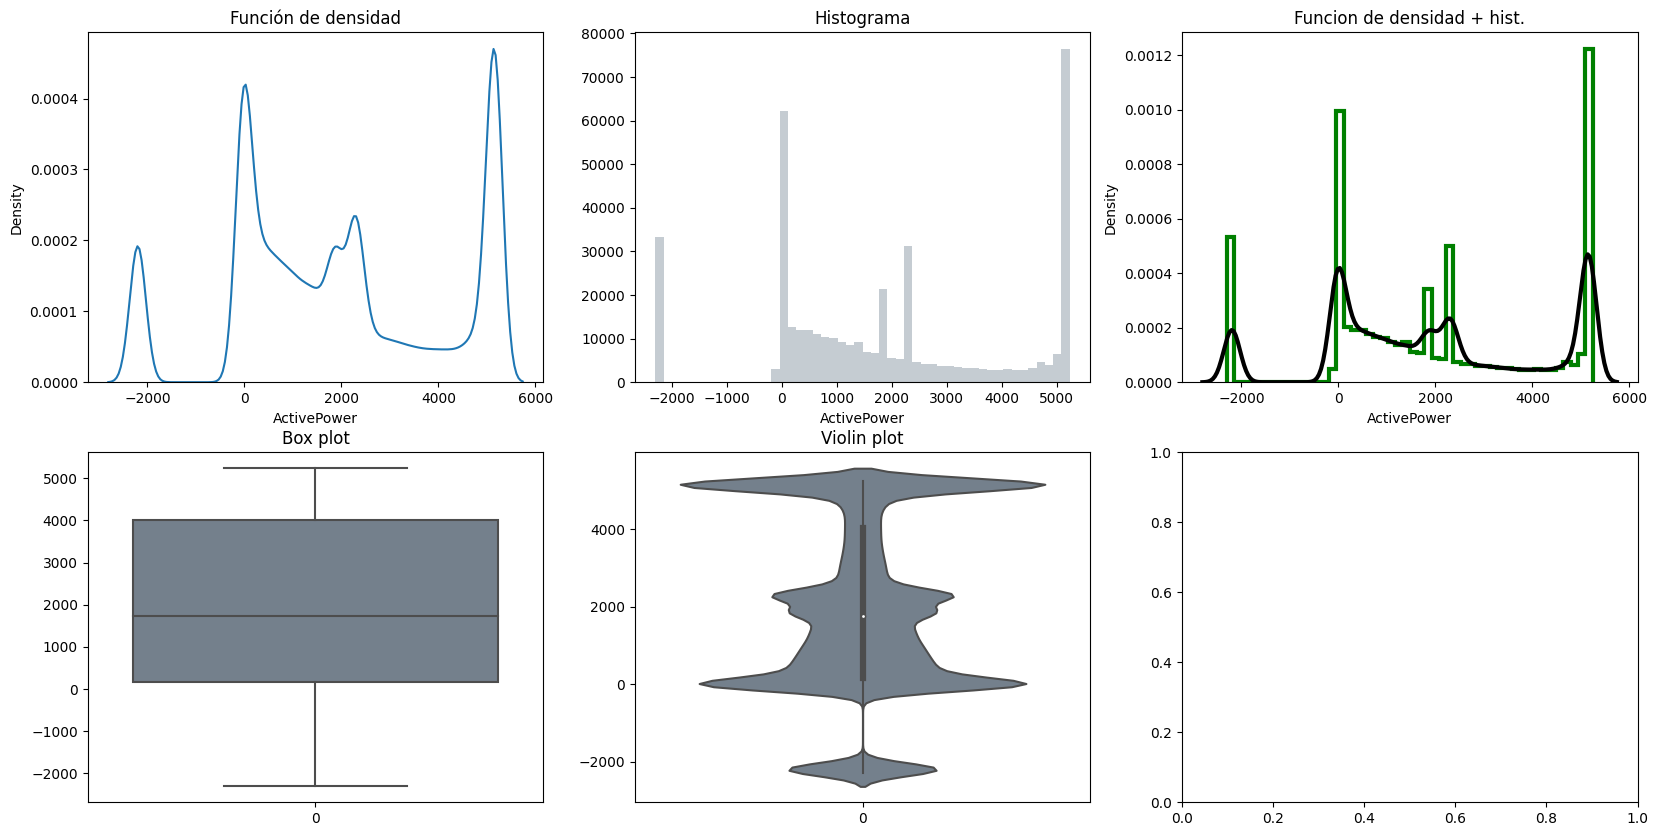

In [10]:
### ACTIVE POWER ###
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Funcion de densidad
sns.distplot(data['ActivePower'], hist = False, ax=axes[0, 0])
axes[0, 0].set_title("Función de densidad")

# Histograma
sns.distplot(data['ActivePower'],
             kde=False,
             color='slategray',
             ax=axes[0, 1]);

axes[0, 1].set_title("Histograma")

# Funcion de densidad + histograma
sns.distplot(data['ActivePower'],
            kde_kws={"color": "k", "lw": 3, "label": "KDE"},
            hist_kws={"histtype": "step", "linewidth": 3,
                      "alpha": 1, "color": "g"},
             ax=axes[0, 2])
axes[0, 2].set_title("Funcion de densidad + hist.")

# Boxplot
sns.boxplot(data['ActivePower'], color="slategray", ax=axes[1, 0])
axes[1, 0].set_title("Box plot")

# Violin plot
sns.violinplot(data['ActivePower'], color="slategray", ax=axes[1, 1]);
axes[1, 1].set_title("Violin plot");

### Dirección del viento

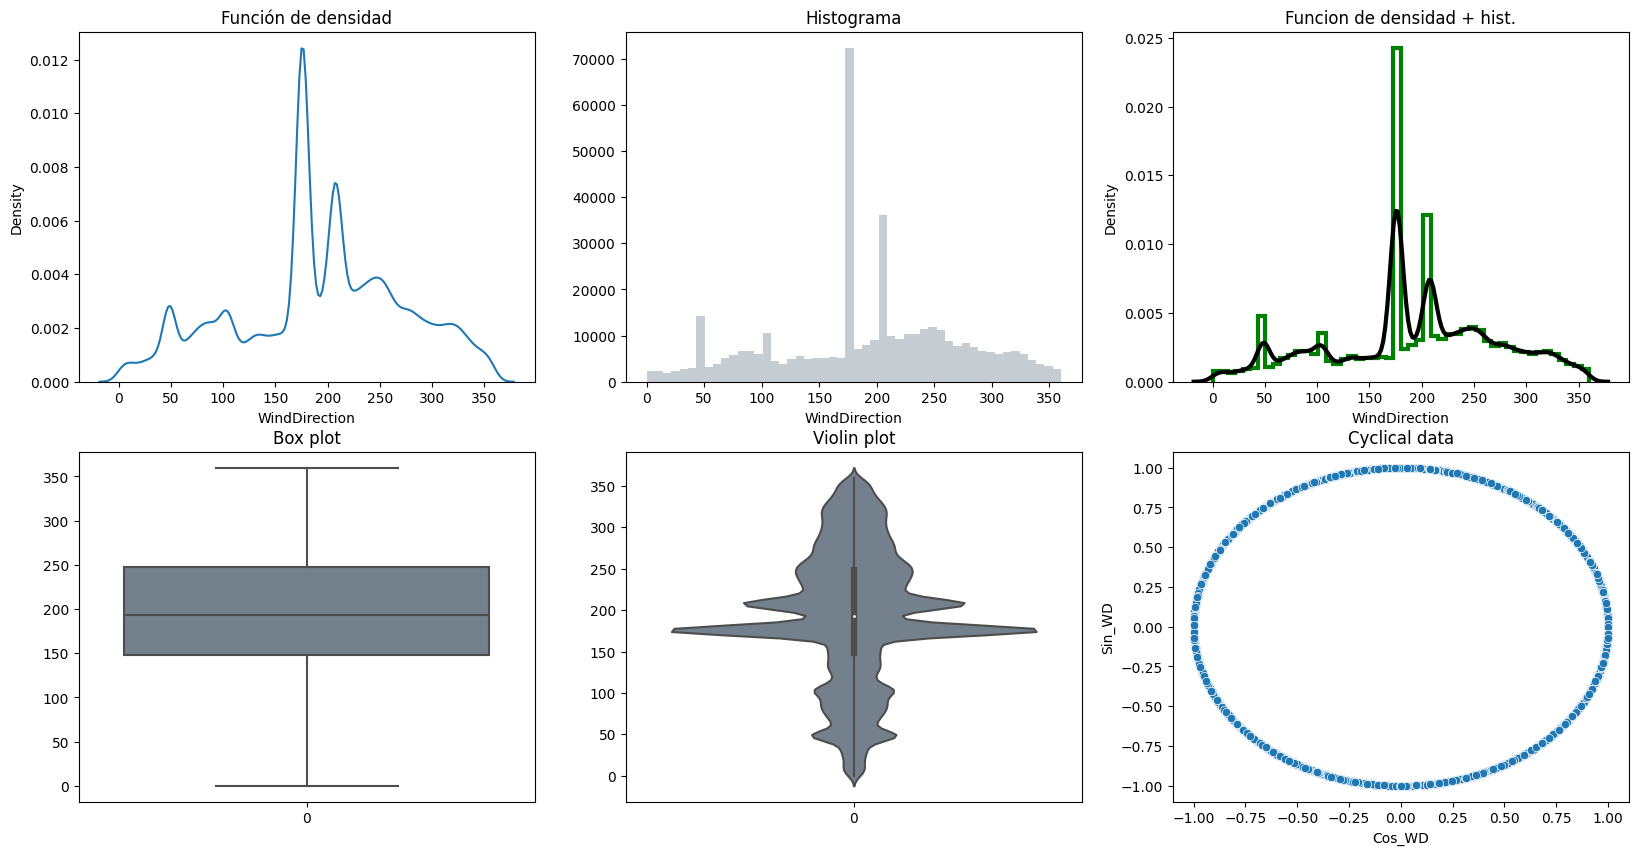

In [11]:
### WIND DIRECTION ###
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Funcion de densidad
sns.distplot(data['WindDirection'], hist = False, ax=axes[0, 0])
axes[0, 0].set_title("Función de densidad")

# Histograma
sns.distplot(data['WindDirection'],
             kde=False,
             color='slategray',
             ax=axes[0, 1]);

axes[0, 1].set_title("Histograma")

# Funcion de densidad + histograma
sns.distplot(data['WindDirection'],
            kde_kws={"color": "k", "lw": 3, "label": "KDE"},
            hist_kws={"histtype": "step", "linewidth": 3,
                      "alpha": 1, "color": "g"},
             ax=axes[0, 2])
axes[0, 2].set_title("Funcion de densidad + hist.")

# Boxplot
sns.boxplot(data['WindDirection'], color="slategray", ax=axes[1, 0])
axes[1, 0].set_title("Box plot")

# Violin plot
sns.violinplot(data['WindDirection'], color="slategray", ax=axes[1, 1]);
axes[1, 1].set_title("Violin plot");

# Cyclical data
sns.scatterplot(data=data, x='Cos_WD', y='Sin_WD', ax=axes[1, 2]);
axes[1, 2].set_title("Cyclical data");

### Ángulo Yaw

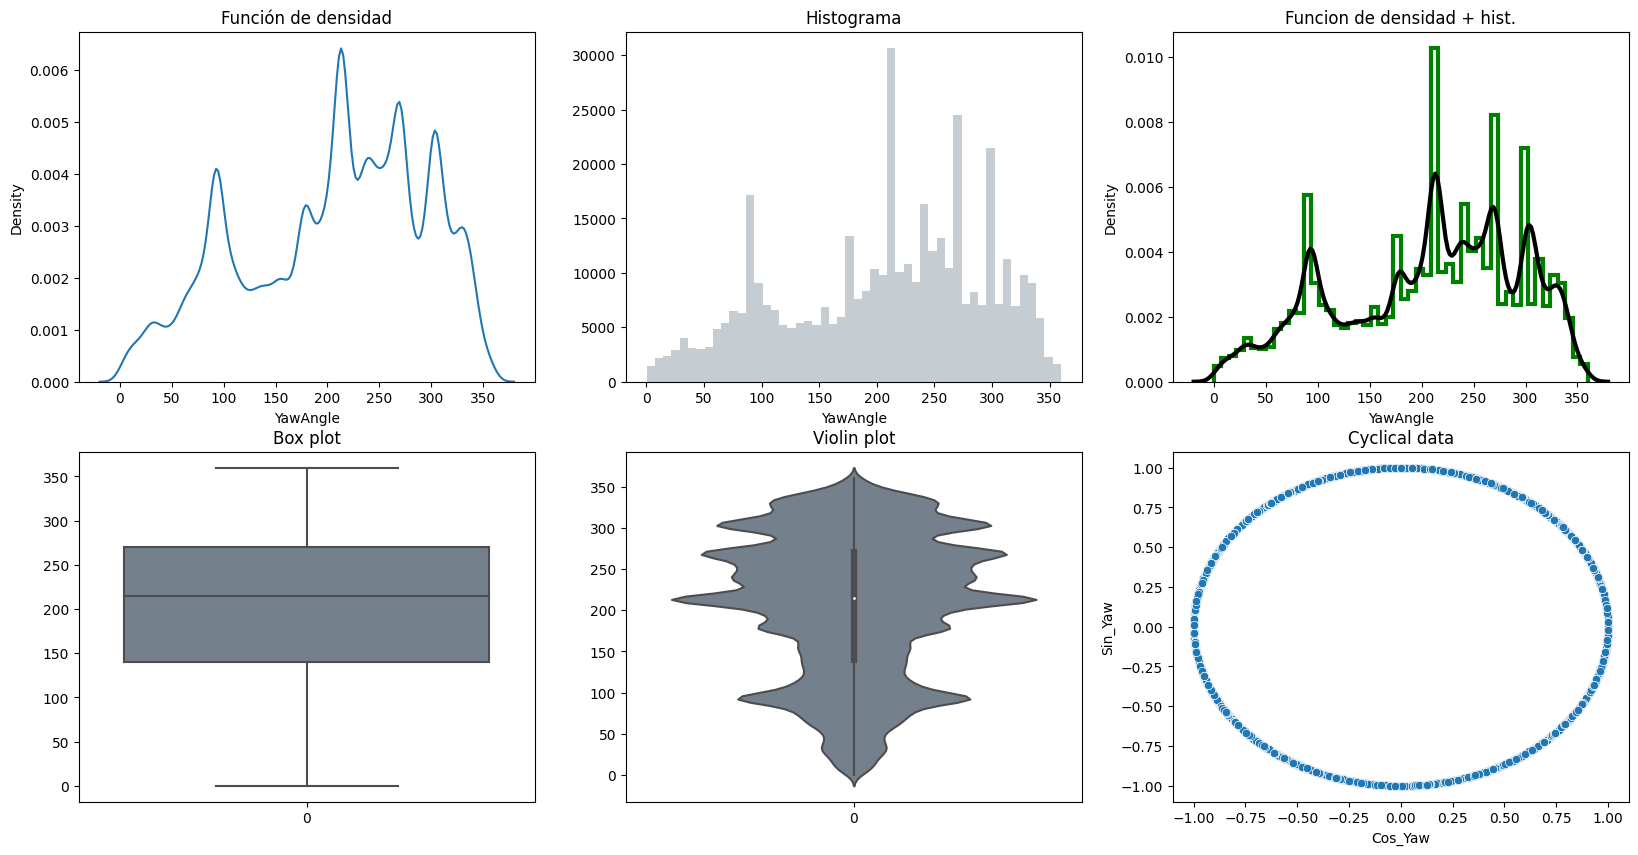

In [12]:
### YAW ANGLE ###
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Funcion de densidad
sns.distplot(data['YawAngle'], hist = False, ax=axes[0, 0])
axes[0, 0].set_title("Función de densidad")

# Histograma
sns.distplot(data['YawAngle'],
             kde=False,
             color='slategray',
             ax=axes[0, 1]);

axes[0, 1].set_title("Histograma")

# Funcion de densidad + histograma
sns.distplot(data['YawAngle'],
            kde_kws={"color": "k", "lw": 3, "label": "KDE"},
            hist_kws={"histtype": "step", "linewidth": 3,
                      "alpha": 1, "color": "g"},
             ax=axes[0, 2])
axes[0, 2].set_title("Funcion de densidad + hist.")

# Boxplot
sns.boxplot(data['YawAngle'], color="slategray", ax=axes[1, 0])
axes[1, 0].set_title("Box plot")

# Violin plot
sns.violinplot(data['YawAngle'], color="slategray", ax=axes[1, 1]);
axes[1, 1].set_title("Violin plot");

# Cyclical data
sns.scatterplot(data=data, x='Cos_Yaw', y='Sin_Yaw', ax=axes[1, 2]);
axes[1, 2].set_title("Cyclical data");

### Estación

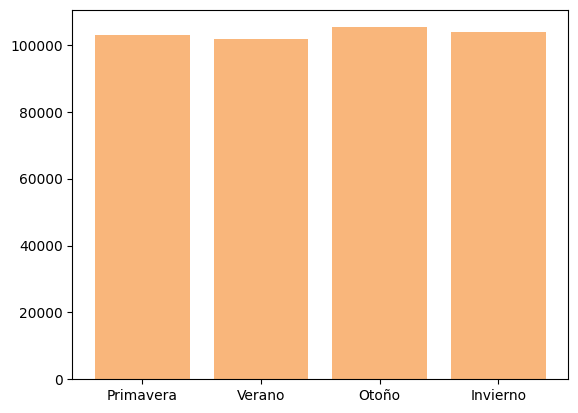

In [13]:
### ESTACIÓN ###
p = int(data['Estacion'][data['Estacion'] == 'primavera'].value_counts())
v = int(data['Estacion'][data['Estacion'] == 'verano'].value_counts())
o = int(data['Estacion'][data['Estacion'] == 'otoño'].value_counts())
i = int(data['Estacion'][data['Estacion'] == 'invierno'].value_counts())

height = [p,v,o,i]
bars = ('Primavera','Verano','Otoño','Invierno')
y_pos = np.arange(len(bars))
# Create bars
plt.bar(y_pos, height, color = '#F9B67B')
# Create names on the x-axis
plt.xticks(y_pos, bars)
# Show graphic
plt.show()

### Momento del día

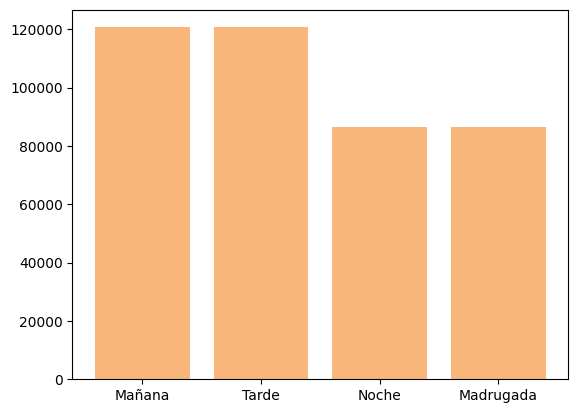

In [14]:
### MOMENTO DIA ###
p = int(data['MomentoDia'][data['MomentoDia'] == 'mañana'].value_counts())
v = int(data['MomentoDia'][data['MomentoDia'] == 'tarde'].value_counts())
o = int(data['MomentoDia'][data['MomentoDia'] == 'noche'].value_counts())
i = int(data['MomentoDia'][data['MomentoDia'] == 'madrugada'].value_counts())

height = [p,v,o,i]
bars = ('Mañana','Tarde','Noche','Madrugada')
y_pos = np.arange(len(bars))
# Create bars
plt.bar(y_pos, height, color = '#F9B67B')
# Create names on the x-axis
plt.xticks(y_pos, bars)
# Show graphic
plt.show()

### Año

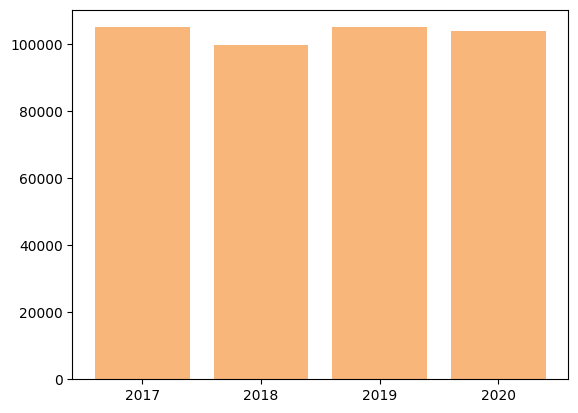

In [15]:
### AÑO ###
p = int(data['Año'][data['Año'] == '2017'].value_counts())
v = int(data['Año'][data['Año'] == '2018'].value_counts())
o = int(data['Año'][data['Año'] == '2019'].value_counts())
i = int(data['Año'][data['Año'] == '2020'].value_counts())

height = [p,v,o,i]
bars = ('2017','2018','2019','2020')
y_pos = np.arange(len(bars))
# Create bars
plt.bar(y_pos, height, color = '#F9B67B')
# Create names on the x-axis
plt.xticks(y_pos, bars)
# Show graphic
plt.show()

## Análisis bivariante

Text(0.5, 1.0, 'Ángulo de Yaw en función del tiempo')

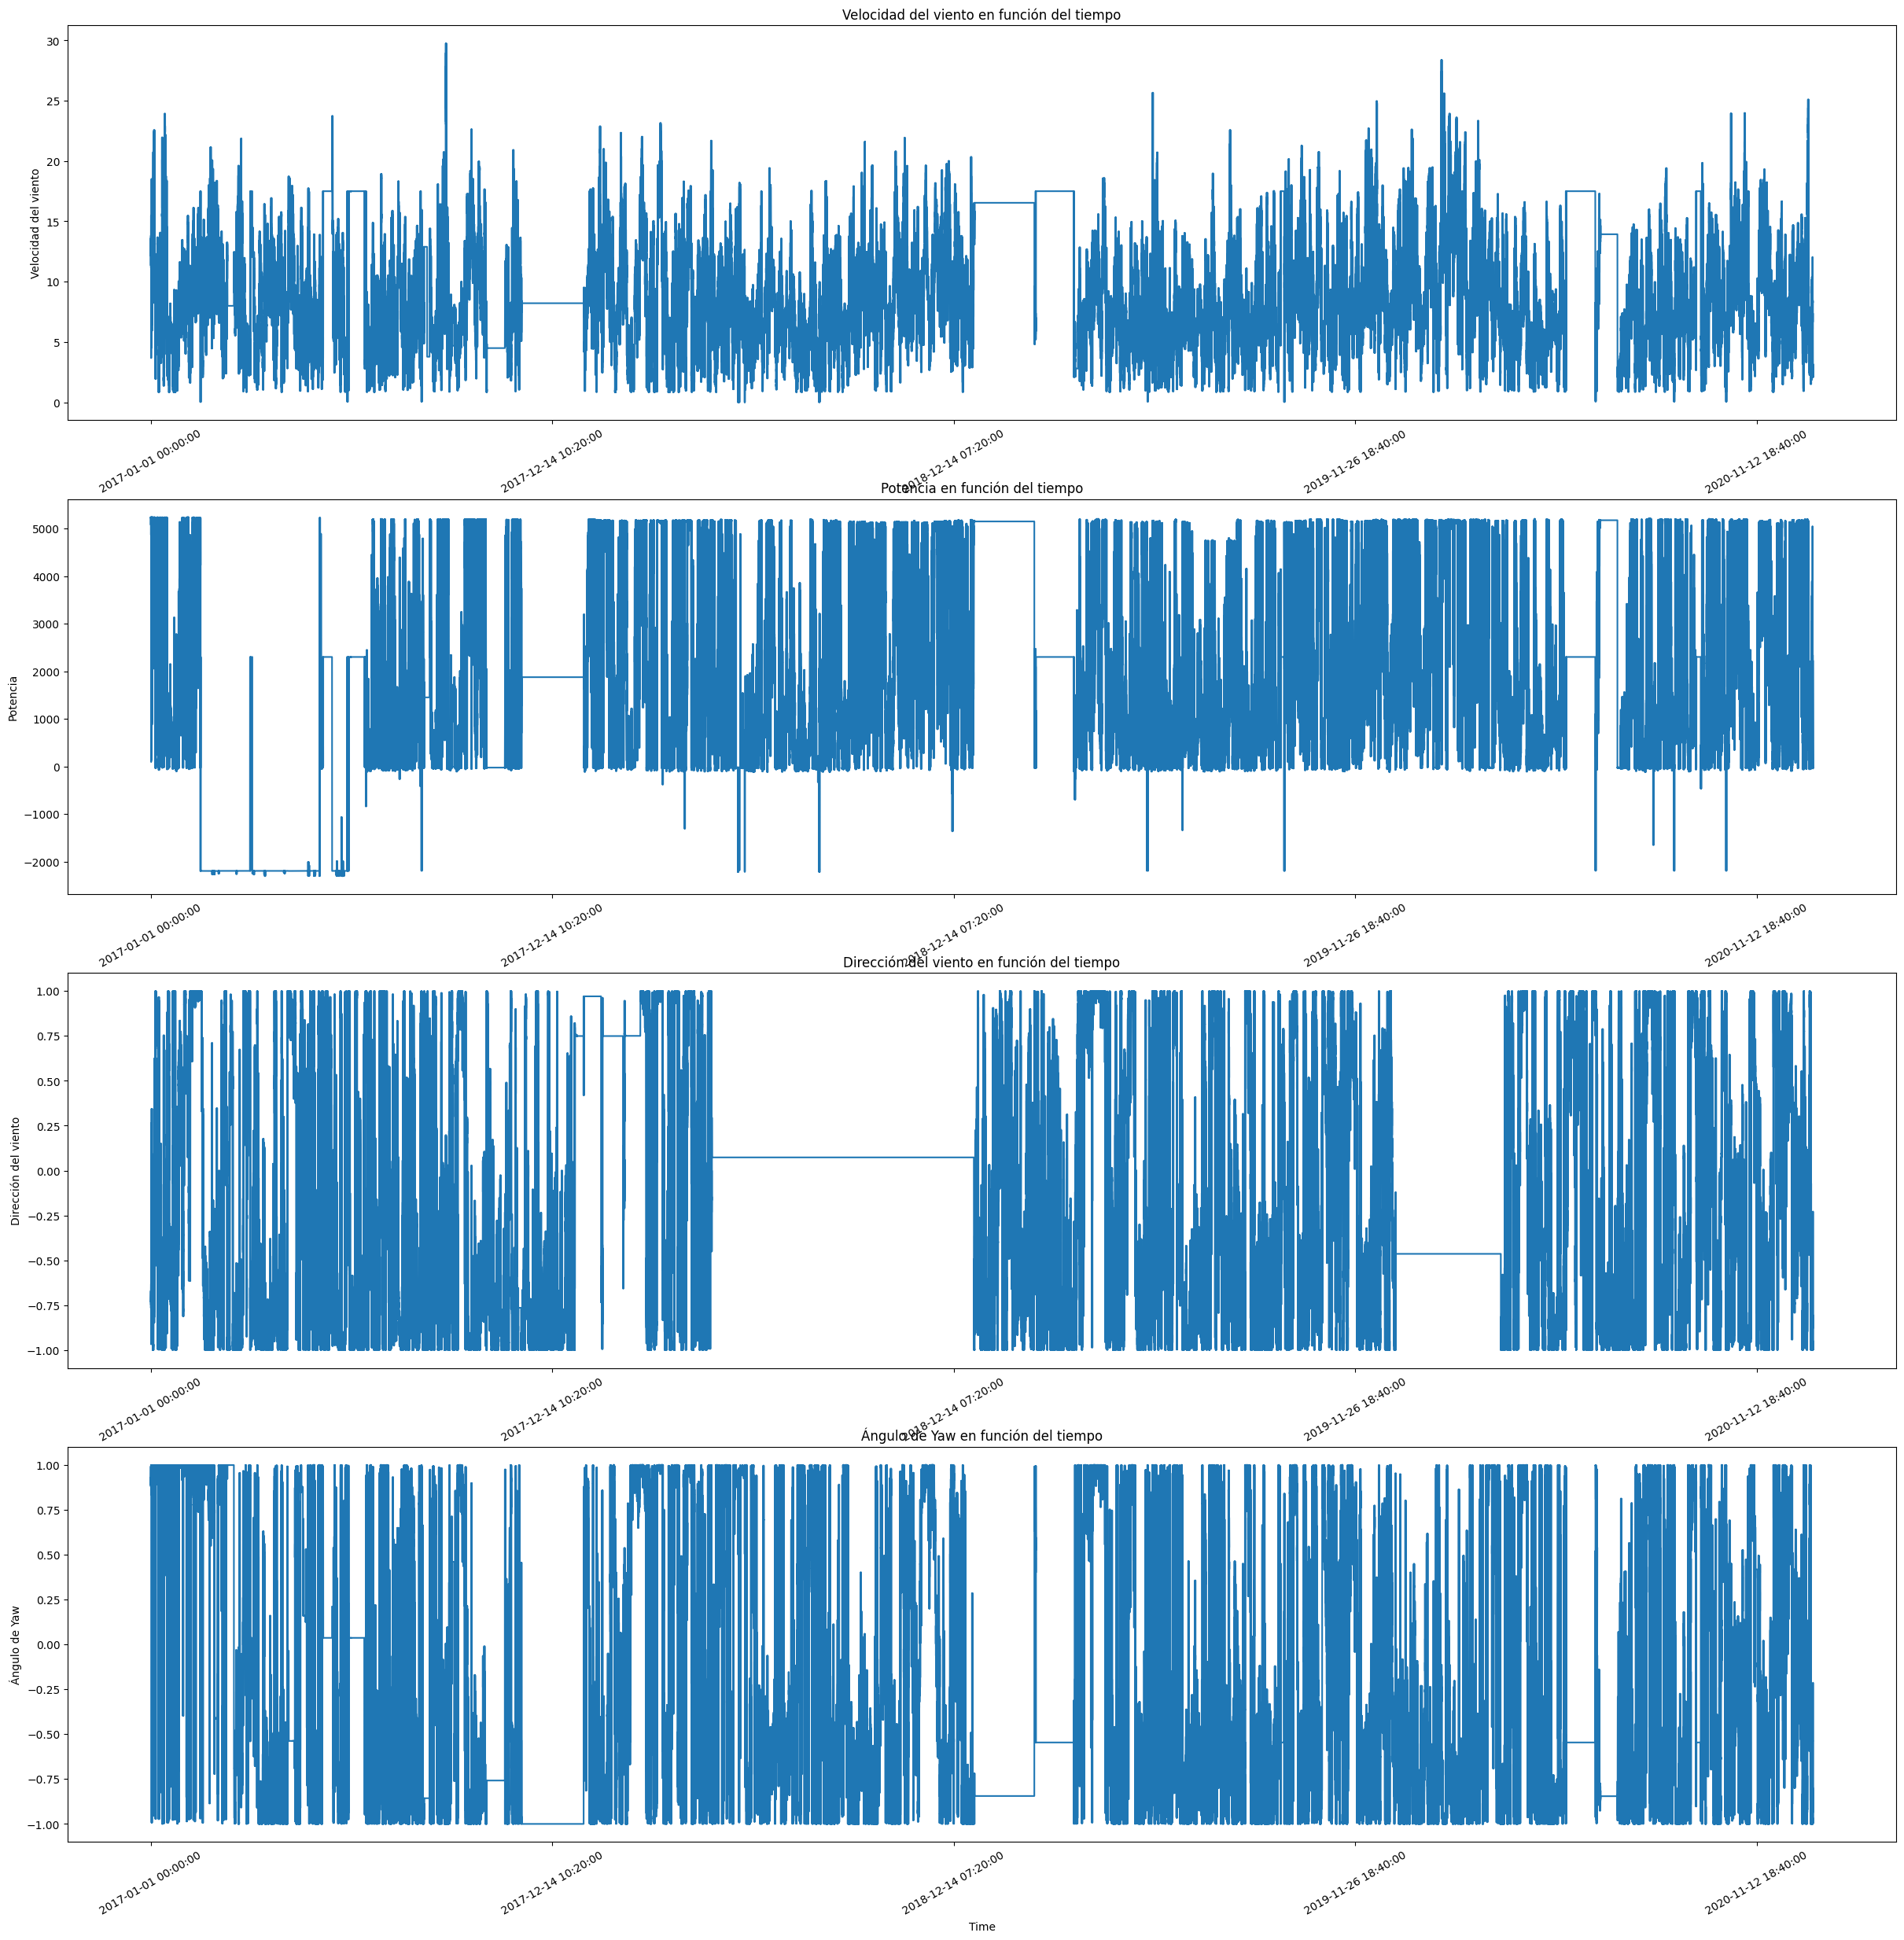

In [16]:
fig, axes = plt.subplots(4, 1, figsize=(30, 30))

# Velocidad del viento + tiempo
data.WindSpeed.plot(rot=30, ax=axes[0])
axes[0].set_ylabel("Velocidad del viento")
axes[0].set_title("Velocidad del viento en función del tiempo")

# Potencia + tiempo
data.ActivePower.plot(rot=30, ax=axes[1])
axes[1].set_ylabel("Potencia")
axes[1].set_title("Potencia en función del tiempo");

# Dirección del viento + tiempo
data.Sin_WD.plot(rot=30,  ax=axes[2])
axes[2].set_ylabel("Dirección del viento")
axes[2].set_title("Dirección del viento en función del tiempo")

# Ángulo de Yaw + tiempo
data.Sin_Yaw.plot(rot=30, ax=axes[3])
axes[3].set_ylabel("Ángulo de Yaw")
axes[3].set_title("Ángulo de Yaw en función del tiempo")

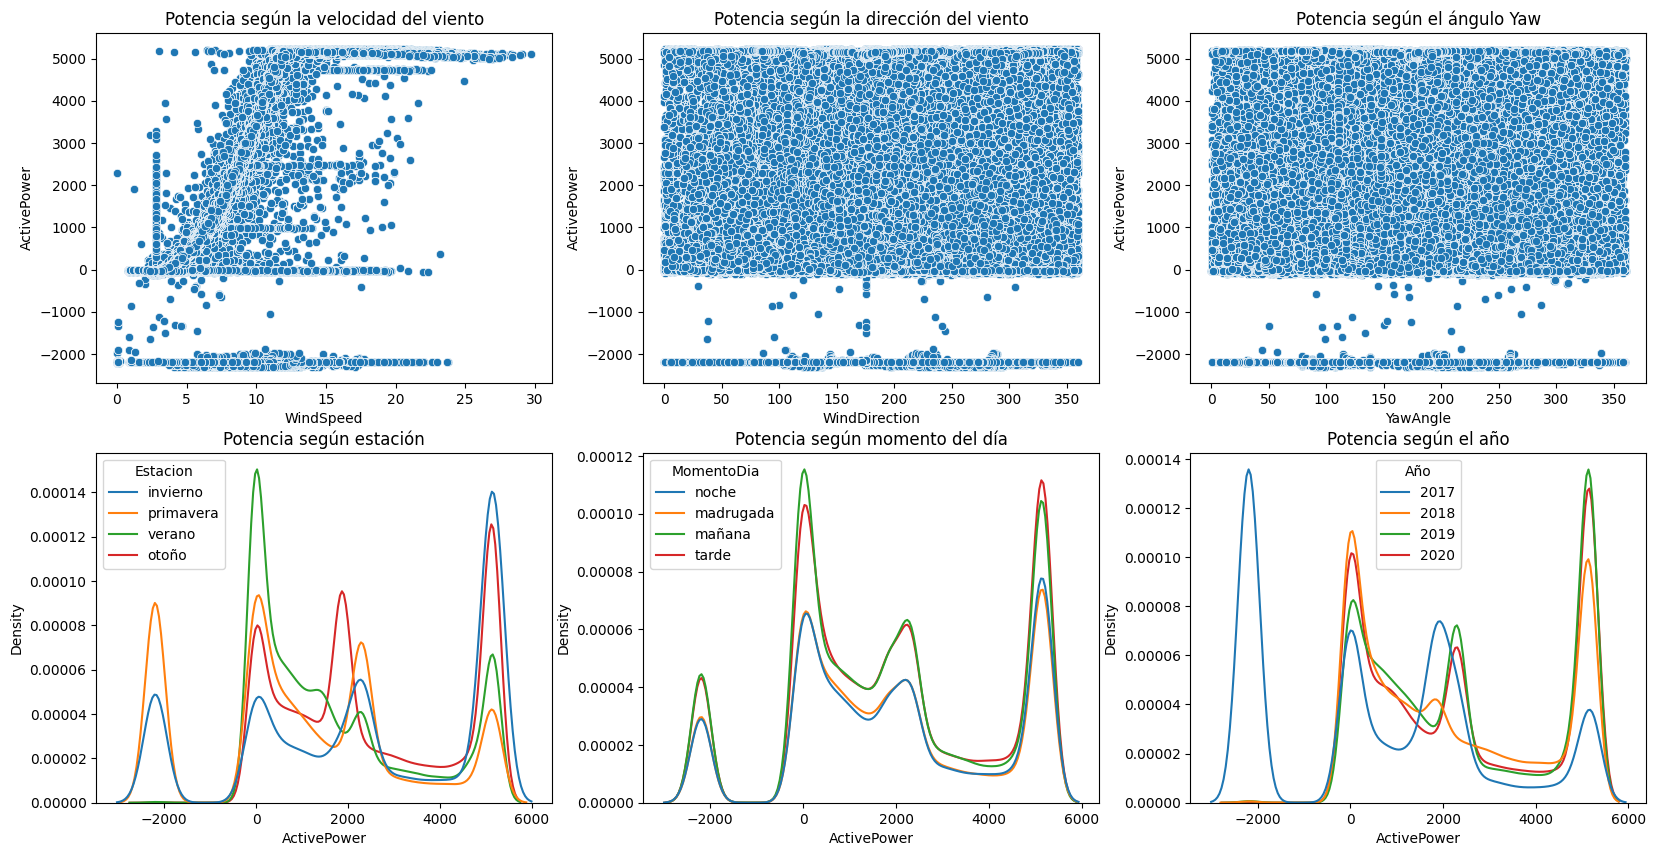

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Velocidad del viento + target
sns.scatterplot(data=data, x='WindSpeed', y='ActivePower', ax=axes[0, 0])
axes[0, 0].set_title("Potencia según la velocidad del viento")

# Dirección del viento + target
sns.scatterplot(data=data, x='WindDirection', y='ActivePower', ax=axes[0, 1])
axes[0, 1].set_title("Potencia según la dirección del viento")

# Ángulo de Yaw + target
sns.scatterplot(data=data, x='YawAngle', y='ActivePower', ax=axes[0, 2])
axes[0, 2].set_title("Potencia según el ángulo Yaw")

# Estación + target
sns.kdeplot(data=data, x='ActivePower', hue='Estacion', ax=axes[1, 0])
axes[1, 0].set_title("Potencia según estación");

# Momento del día + target
sns.kdeplot(data=data, x='ActivePower', hue='MomentoDia', ax=axes[1, 1])
axes[1, 1].set_title("Potencia según momento del día");

# Año + target
sns.kdeplot(data=data, x='ActivePower', hue='Año', ax=axes[1, 2])
axes[1, 2].set_title("Potencia según el año");

In [18]:
data = data.drop(columns=['WindDirection','YawAngle'])
data.to_csv('../data/processed/set_data.csv', index=True)